In [1]:
import numpy as np
import graphtools
import matplotlib.pyplot as plt
from pecan import data
from pecan.curvature import DiffusionForkCurvature
%load_ext autoreload
%autoreload 2

In [2]:
X = data.sphere(6400)

In [21]:
%%time
drc = DiffusionForkCurvature(X,num_steps=30,knn=10,n_evecs=2,radius=0.3)

CPU times: user 1.18 s, sys: 244 ms, total: 1.43 s
Wall time: 545 ms


In [28]:
%%time
pointwise_curvatures = drc.pointwise_curvature()

  1%|          | 77/6400 [00:10<11:37,  9.07it/s]/Users/adjourner/models/PECAN/pecan/curvature.py:785: RuntimeWarning: invalid value encountered in double_scalars
  - 2 * B * AI * ((B ** 2 + C ** 2 - A ** 2) / (2 * B * C))
100%|██████████| 6400/6400 [12:13<00:00,  8.72it/s]CPU times: user 11min 46s, sys: 19 s, total: 12min 5s
Wall time: 12min 13s



In [29]:
# Import dependencies
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()
def plot_3d(X,distribution,title="",lim=1):
    d = {'x':X[:,0],'y':X[:,1],'z':X[:,2],'colors':distribution}
    df = pd.DataFrame(data=d)
    fig = px.scatter_3d(df, x='x',y='y',z='z',color='colors', title=title)
    fig.show()

In [31]:
plot_3d(X,pointwise_curvatures,title="Pointwise Diffusion Fork Curvature")

# The Torus

In [43]:
X = data.torus(6000)

In [44]:
%%time
drc = DiffusionForkCurvature(X,num_steps=30,knn=10,n_evecs=2,radius=0.1)

CPU times: user 1.16 s, sys: 315 ms, total: 1.47 s
Wall time: 644 ms


In [45]:
%%time
pointwise_curvatures = drc.pointwise_curvature()

  0%|          | 8/6000 [00:00<04:36, 21.66it/s]/Users/adjourner/models/PECAN/pecan/curvature.py:785: RuntimeWarning:

invalid value encountered in double_scalars

100%|██████████| 6000/6000 [04:05<00:00, 24.47it/s]CPU times: user 3min 57s, sys: 5.91 s, total: 4min 3s
Wall time: 4min 5s



In [46]:
plot_3d(X,pointwise_curvatures,title="Pointwise Diffusion Fork Curvature")

# The PLANE

In [62]:
X = np.mgrid[0:4:0.05, 0:4:0.05].reshape(2,-1).T

In [145]:
%%time
drc = DiffusionForkCurvature(X,num_steps=30,knn=10,n_evecs=2,radius=0.5)

CPU times: user 837 ms, sys: 248 ms, total: 1.08 s
Wall time: 913 ms


In [67]:
%%time
pointwise_curvatures = drc.pointwise_curvature()

  0%|          | 0/6400 [00:00<?, ?it/s]


ValueError: 'a' cannot be empty unless no samples are taken

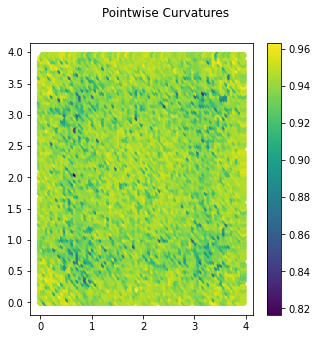

In [51]:
# visualize
fig = plt.figure(figsize=(5,5))
fig.suptitle(f"Pointwise Curvatures")
ax1 = plt.subplot(1,1,1)
im = ax1.scatter(X[:,0],X[:,1],c=pointwise_curvatures)
fig.colorbar(im, ax=ax1)

In [146]:
i = 3000
k, curvs, triangles,ray1, ray2 = drc.curvature(i,num_triangles=5)

The diffusion distance is 0.048895031912656754
The euclidean distance is 0.049166487483594146
The diffusion distance is 0.044506906267843295
The euclidean distance is 0.04453324352973921
The diffusion distance is 0.07256199012648677
The euclidean distance is 0.0729478877180534
The diffusion distance is 0.02483828281768195
The euclidean distance is 0.024493183788420525
The diffusion distance is 0.06908220306458861
The euclidean distance is 0.06930721267035146
The diffusion distance is 0.0680338893168304
The euclidean distance is 0.06829098310005204
The diffusion distance is 0.06792906275398294
The euclidean distance is 0.06832013523142702
The diffusion distance is 0.050025545862129484
The euclidean distance is 0.04962682165973362
The diffusion distance is 0.06387001656175652
The euclidean distance is 0.06350881774040279
The diffusion distance is 0.06663221909169494
The euclidean distance is 0.06679891279799754
The diffusion distance is 0.011496804228448072
The euclidean distance is 0.01

In [147]:
curvs

array([[1.0055518 , 1.00059176, 1.00531818, 0.98610616, 1.00325713],
       [1.00377891, 1.00575707, 0.99202959, 0.99434478, 1.0025017 ],
       [1.00850434, 1.00728252, 1.01165166, 0.99140033, 1.02637282],
       [0.98636974, 0.9822307 , 1.02511869, 1.0028091 , 0.99454057],
       [0.99664562, 1.00020668, 1.00033855, 0.99616645, 0.99512761],
       [0.99766296, 1.00871007, 1.0014933 , 1.00135603, 1.00677826],
       [1.0108505 , 0.9911256 , 1.00307684, 0.99740838, 0.99149375],
       [1.0007225 , 1.00213908, 1.00023407, 1.0001482 , 0.99969337],
       [1.00065962, 1.00514836, 0.99539291, 0.99289289, 0.99350652],
       [1.0013197 , 1.00083994, 1.00016802, 0.99946773, 1.00222503]])

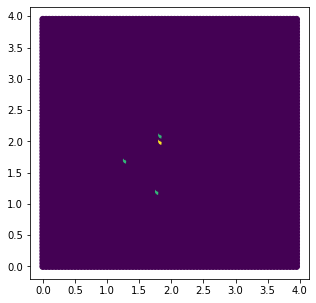

In [142]:
distributions = np.zeros((len(X)))
distributions[triangles[20]] = 1
distributions[i] = 1.5
fig = plt.figure(figsize=(5,5))
fig.suptitle(f"")
ax1 = plt.subplot(1,1,1)
ax1.scatter(X[:,0],X[:,1],c=distributions)

In [56]:
C = 2
AI = 1
B = np.sqrt(2)
A = np.sqrt(2)

In [57]:
CI_euclidean = (
                    B ** 2
                    + AI ** 2
                    - 2 * B * AI * ((B ** 2 + C ** 2 - A ** 2) / (2 * B * C))
                )

In [58]:
CI_euclidean

1.0000000000000009

In [60]:
a = np.array([[10,20],[15,25]])

In [61]:
np.mean(a,axis=1)

array([15., 20.])

In [72]:
a = np.array([1,2,3,4,5])

In [79]:
np.where(a==3)[0][0]

2

In [ ]:
sorted_by_i = np.argsort(distances_to_i[ray])
endpoint = sorted_by_i[-1] # find the index of the element in the ray that is the furthest from i
closest_to_i = sorted_by_i[0] # the index of the element that is i (used later to split the ray into two pieces)
ray_distances_to_endpoint = np.argsort(self.diffusion_distances_to(ray[endpoint])[ray]) # the indices sorted by the distances from each point in the ray to the endpoint
index_of_i = np.where(ray_distances_to_endpoint==closest_to_i)
ray1 = ray[ray_distances_to_endpoint[:index_of_i]]
ray2 = ray[ray_distances_to_endpoint[index_of_i:]]